# Support Vector Machine Exhibition

In this notebook we will be looking at an implementation of the linear Support Vector Machine from scratch and compare it against its sklearn counterpart.  A linear Support Vector Machine is a line whose weights are trained by a gradient descent process that searches for a classifier with the best margins between groups of points.  To begin, let's import all the relevant packages that'll be used in the notebook.

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

import from_scratch.split_data as split_data
import from_scratch.svm as svm


# 2D Data

As a sanity check, let's generate some 2D blobs and see how both our from-scratch SVM and the sklearn SVM do in producing a maximum margin classifier.

[]

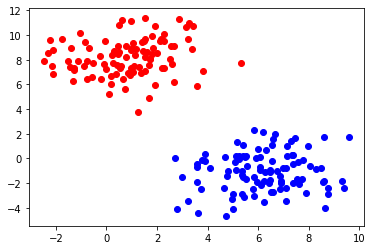

In [7]:
# Create data
TwoDFeatures, TwoDTargets = make_blobs(
    n_samples=200, n_features=2, centers=2, cluster_std=1.5)

ClassA = TwoDTargets == 0
TwoDTargets[ClassA] = -1
plt.scatter(TwoDFeatures[ClassA, 0], TwoDFeatures[ClassA, 1], color="red")

ClassB = TwoDTargets == 1
plt.scatter(TwoDFeatures[ClassB, 0], TwoDFeatures[ClassB, 1], color="blue")

plt.plot()


## From Scratch Implementation

In [8]:
# Add bias to features
TwoDFeatures_modded = np.hstack(
    (TwoDFeatures, np.ones((TwoDFeatures.shape[0], 1))))


In [9]:
# Train/test split
train_features, train_targets, test_features, test_targets = split_data.train_test_split(
    TwoDFeatures_modded.T, TwoDTargets.reshape(1, TwoDTargets.shape[0]))


In [10]:
# Train model
svm_model = svm.SVM(train_features.shape[0])
svm_model.fit(train_features, train_targets)


| epoch 1 | loss 12.51523697782912
| epoch 2 | loss 0.17337769614165974
| epoch 4 | loss 0.1732667698608621


In [11]:
# Test model
predictions = svm_model.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[1] * 100 :2.3f}%")


Accuray = 100.000%


[]

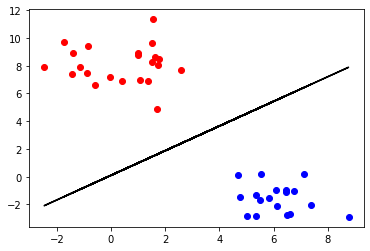

In [12]:
# Visualize model
line = svm_model.weights.T
w_0 = line[2]
w_1 = line[0]
w_2 = line[1]

discriminator = -(w_1/w_2)*test_features[0, :] - (w_0/w_2)

test_ClassA = test_targets[0, :] == -1
plt.scatter(test_features[0, test_ClassA],
            test_features[1, test_ClassA], color="red")

test_ClassB = test_targets[0, :] == 1
plt.scatter(test_features[0, test_ClassB],
            test_features[1, test_ClassB], color="blue")

plt.plot(test_features[0, :], discriminator, color="black")
plt.plot()


## Sklearn Implementation

In [13]:
# Train-test split
train_features, test_features, train_targets, test_targets = train_test_split(
    TwoDFeatures, TwoDTargets)


In [14]:
# Train model
linear_svm = LinearSVC(loss="hinge", max_iter=5000)
linear_svm.fit(train_features, train_targets)


LinearSVC(loss='hinge', max_iter=5000)

In [15]:
# Test model
predictions = linear_svm.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[0] * 100 :2.3f}%")


Accuray = 100.000%


[]

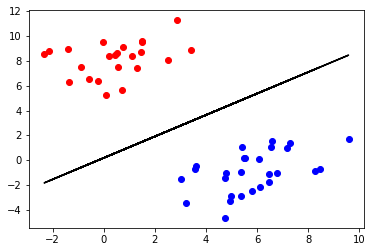

In [16]:
# Visualize model
w_1 = linear_svm.coef_[0, 0]
w_2 = linear_svm.coef_[0, 1]
w_0 = linear_svm.intercept_[0]

discriminator = -(w_1/w_2)*test_features[:, 0] - (w_0/w_2)

test_ClassA = test_targets == -1
plt.scatter(test_features[test_ClassA, 0],
            test_features[test_ClassA, 1], color="red")

test_ClassB = test_targets == 1
plt.scatter(test_features[test_ClassB, 0],
            test_features[test_ClassB, 1], color="blue")

plt.plot(test_features[:, 0], discriminator, color="black")
plt.plot()


As we can see, both the from-scratch and sklearn implementations work perfectly at separating linearly separable blobs of data in 2D.  However, we could have simply used a perceptron here, so why is an SVM so useful?  Well, the SVM is very useful a separating data with many dimensions, as we will see in the following breast cancer data example.

# Breast Cancer Data

To illustrate the efficacy of the from-scratch SVM in a high dimensional setting, we examine the the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) posted by the University of California Irvine.


In [17]:
# Load data
original_data = pd.read_csv("data/breast_cancer.csv", sep=',')
original_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


To model the data, we will need to remove useless columns like the 'id' and 'Unnamed: 32' column as well as map the 'M' and 'B' diagnoses to -1 and 1, respectively.

In [18]:
# Clean data
diagnosis_map = {'M': 1, 'B': - 1}
original_data["diagnosis"] = original_data["diagnosis"].map(diagnosis_map)
original_data.drop(original_data.columns[[-1, 0]], axis=1,  inplace=True)
original_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The 'diagnosis' column is what we are trying to predict, so we pull out that column to be our target.  Then, we normalize the features of the dataset to make it easier for our model to train.

In [19]:
# Split into features and targets and normalize
Y = original_data.loc[:, "diagnosis"]
X = original_data.iloc[:, 1:]

X_normalized = (X - X.min())/(X.max() - X.min())
X_norm_copy = X_normalized.copy()
X_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## From Scratch Implementation

With the data cleaned up, let's see how our from-scratch implementation does.

In [20]:
# Train/test split
X_normalized.insert(loc=len(X_norm_copy.columns),
                    column="intercept", value=1)  # add bias to features

train_features, train_targets, test_features, test_targets = split_data.train_test_split(
    X_norm_copy.values.T, Y.values.reshape((1, Y.shape[0])))


In [21]:
# Train model
svm_model = svm.SVM(train_features.shape[0])
svm_model.fit(train_features, train_targets)


| epoch 1 | loss 5881.17683128923
| epoch 2 | loss 4989.1526879641515
| epoch 4 | loss 4202.566112544171
| epoch 8 | loss 3497.2428434958674
| epoch 16 | loss 2952.421453727741
| epoch 32 | loss 2403.7305643670525
| epoch 64 | loss 1946.8350998176736
| epoch 128 | loss 1632.992039014368
| epoch 256 | loss 1428.0734152416796
| epoch 512 | loss 1335.457984091465
| epoch 1024 | loss 1293.5906217425197
| epoch 2048 | loss 1265.193972956656
| epoch 4096 | loss 1274.2730194449553


In [22]:
# Test model
predictions = svm_model.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[1] * 100 :2.3f}%")


Accuray = 97.368%


As we can see, the model is pretty accurate at around 97%!  Unfortuntaely, it took the model quite a while to go through four thousand epochs.

## Sklearn Implementation

Let's now see how the Sklearn implementation stacks up.

In [23]:
# Train-test split
train_features, test_features, train_targets, test_targets = train_test_split(
    X_normalized.values, Y)


In [24]:
# Train model
linear_svm = LinearSVC(loss="hinge", max_iter=5000)
linear_svm.fit(train_features, train_targets, )


LinearSVC(loss='hinge', max_iter=5000)

In [25]:
# Test model
predictions = linear_svm.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[0] * 100 :2.3f}%")


Accuray = 97.902%


The Sklearn implementation also reaches an accuracy of 97% but takes only a fraction of time when compared to the from-scratch implementation.  This ought to be an area for further investigation.

In this exhibition we showed a from-scratch implementation of a linear support vector machine that performs just as well as its industry-standard, Sklearn counterpart.  SVM's, when combined with kernel functions, are fast and accurate white-box classifiers are able to tackle many high-dimensional datasets.  If I wanted to extend this exhibition further, I would incorporate kernel functions so that nonlinear datasets (polar/circual datasets, for example) can still be separated.  